# Benchmark signals: synthetic

In [18]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Simple chirp

## Mixed signal

Synthetic signals in time-frequency analysis are often made by combining sine waves, chirps and wavelets. Let's instead make a synthetic signal in a geological way, by making layers of 'rock' then convolving with a wavelet.

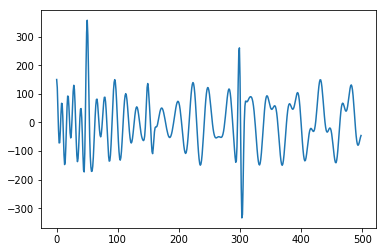

In [2]:
vp = 2000 * np.ones(500)
vp[:50] = 1490
vp[150:152] = 2250
vp[154:156] = 2250

vp2 = np.zeros(500)
vp2[300:303] = 2400

from scipy.signal import ricker
w = ricker(64, 3)
syn = np.convolve(np.diff(vp), w, mode='same')

w2 = ricker(64, 6)
syn2 = np.convolve(np.diff(vp2), w, mode='same')
syn2 += np.convolve(np.diff(vp2), w2, mode='same')

syn += syn2 / 5

from scipy.signal import chirp
dt = 0.002
t = np.arange(0, syn.size*dt, dt)
chp = chirp(t, 60, t[-1], 10, method='hyperbolic')
syn += 100 * chp
chp = chirp(t, 20, t[-1], 30, method='linear')
syn += 50 * chp

#plt.plot(w)
plt.plot(syn)
plt.show()

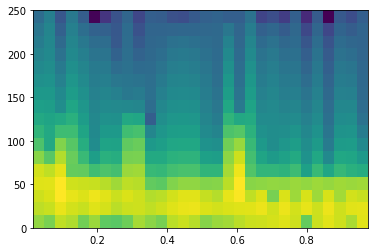

In [3]:
_ = plt.specgram(syn, Fs=1/dt, NFFT=32, noverlap=16)

In [4]:
from scipy.interpolate import interp1d
import IPython.display as ipd

n = 500  # Factor to subsample

oldt = np.arange(0, syn.size)
newt = np.arange(0, syn.size, 1/n)

func = interp1d(oldt, syn, bounds_error=False, fill_value=0)
news = func(newt)

In [5]:
shift = 50 # Hz
NEWS = np.fft.rfft(news)
freq = np.fft.rfftfreq(news.size, dt)
shift = int(shift / freq[1])
NEWS_shift = np.roll(NEWS, shift)
NEWS_shift[:shift] = 0
news_shift = np.fft.irfft(NEWS_shift)

In [6]:
fs = 1 / dt
ipd.Audio(news, rate=n*fs/2)

In [7]:
header  = "Synthetic signal.\n"
header += "(c) Agile Scientific, licensed CC-BY.\n"
header += f"sample rate = {fs} Hz"

In [8]:
np.savetxt(f'benchmark_signals/synthetic_{fs}Hz.txt', syn, header=header)

## Synthetic seismic